# Importing required Libraries

In [626]:
#Loading the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

Importing Both Train and Test Data

In [627]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
combine = [train , test]
print(train.shape)
print(test.shape)

(79853, 12)
(34224, 11)


There are 79853 records and 12 columns in the Train data.
There are 34224 records and 11 columns in the Test data.

# Data Understanding and Cleaning

In [628]:
train.head(2)

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.42900,12058,355060,0.00000,0.00000,0.00000,99.02000,13,C,Urban,1
1,41492,0.01000,21546,315150,0.00000,0.00000,0.00000,99.89000,21,A,Urban,1


In [629]:
test.head(2)

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
0,649,0.00100,27384,51150,0.00000,0.00000,0.00000,99.89000,7,A,Rural
1,81136,0.12400,23735,285140,0.00000,0.00000,0.00000,98.93000,19,A,Urban


In [630]:
train.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
count,79853.00000,79853.00000,79853.00000,79853.00000,79756.00000,79756.00000,79756.00000,76879.00000,79853.00000,79853.00000
mean,57167.16637,0.31429,18846.69691,208847.17118,0.24867,0.07819,0.06001,99.06729,10.86389,0.93741
std,32928.97016,0.33491,5208.71914,496582.59726,0.69147,0.43651,0.31202,0.73980,5.17069,0.24223
min,2.00000,0.00000,7670.00000,24030.00000,0.00000,0.00000,0.00000,91.90000,2.00000,0.00000
25%,28640.00000,0.03400,14974.00000,108010.00000,0.00000,0.00000,0.00000,98.81000,7.00000,1.00000
50%,57262.00000,0.16700,18625.00000,166560.00000,0.00000,0.00000,0.00000,99.21000,10.00000,1.00000
75%,85632.00000,0.53800,22636.00000,252090.00000,0.00000,0.00000,0.00000,99.54000,14.00000,1.00000
max,114076.00000,1.00000,37602.00000,90262600.00000,13.00000,17.00000,11.00000,99.89000,60.00000,1.00000


In [631]:
train['target'].value_counts()

1    74855
0     4998
Name: target, dtype: int64

74855 paid there premiums 
4998 are defaulters 

In [632]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                79853 non-null  int64  
 1   perc_premium_paid_by_cash_credit  79853 non-null  float64
 2   age_in_days                       79853 non-null  int64  
 3   Income                            79853 non-null  int64  
 4   Count_3-6_months_late             79756 non-null  float64
 5   Count_6-12_months_late            79756 non-null  float64
 6   Count_more_than_12_months_late    79756 non-null  float64
 7   application_underwriting_score    76879 non-null  float64
 8   no_of_premiums_paid               79853 non-null  int64  
 9   sourcing_channel                  79853 non-null  object 
 10  residence_area_type               79853 non-null  object 
 11  target                            79853 non-null  int64  
dtypes: f

# Correlation Plot

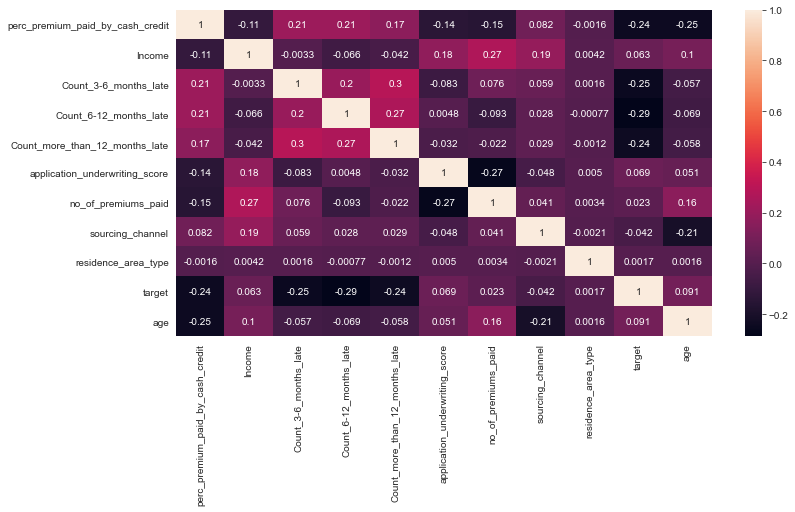

In [681]:
plt.figure(figsize=(12,6))
sns.heatmap(train.corr(),annot=True)
plt.show()

Makes Groups For Age and Income (Convert age in days to Years first then grouping them)

In [634]:
train['age'] = train['age_in_days']//365
train.drop(['age_in_days'], axis = 1, inplace = True)

In [635]:
test['age'] = test['age_in_days']//365
test.drop(['age_in_days'], axis = 1, inplace = True)

In [636]:
train['AgeBands'] = pd.cut(train['age'], 5)
train[['AgeBands', 'target']].groupby('AgeBands', as_index = False).count()

,AgeBands,target
0,"(20.918, 37.4]",14314
1,"(37.4, 53.8]",30585
2,"(53.8, 70.2]",26773
3,"(70.2, 86.6]",7531
4,"(86.6, 103.0]",650


In [637]:
train.loc[ train['age'] <= 37.4, 'age'] = 0
train.loc[(train['age'] > 37.4) & (train['age'] <= 53.8), 'age'] = 1
train.loc[(train['age'] > 53.8) & (train['age'] <= 70.2), 'age'] = 2
train.loc[(train['age'] > 70.2) & (train['age'] <= 86.6), 'age'] = 3
train.loc[ train['age'] > 86.6, 'age'] = 4
train.drop('AgeBands', axis = 1, inplace = True)

In [638]:
train['residence_area_type'] = train['residence_area_type'].map( {'Urban' : 1, 'Rural' : 0} )

In [639]:
train['sourcing_channel'] = train['sourcing_channel'].map( {'A' : 0, 'B' : 1, 'C' : 2, 'D' : 3, 'E' : 4} )

Drop the Id column because it can't help for prediction

In [640]:
train.drop(['id'],axis=1,inplace=True)

In [641]:
train.head()

,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,age
0,0.42900,355060,0.00000,0.00000,0.00000,99.02000,13,2,1,1,0
1,0.01000,315150,0.00000,0.00000,0.00000,99.89000,21,0,1,1,2
2,0.91700,84140,2.00000,3.00000,1.00000,98.69000,7,2,0,0,1
3,0.04900,250510,0.00000,0.00000,0.00000,99.57000,9,0,1,1,1
4,0.05200,198680,0.00000,0.00000,0.00000,99.87000,12,1,1,1,3


In [642]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [643]:
train['Income'].describe()

count      79853.00000
mean      208847.17118
std       496582.59726
min        24030.00000
25%       108010.00000
50%       166560.00000
75%       252090.00000
max     90262600.00000
Name: Income, dtype: float64

In [644]:
train['Income'].describe(percentiles = [.98, .07, .06])

count      79853.00000
mean      208847.17118
std       496582.59726
min        24030.00000
6%         57951.20000
7%         60120.00000
50%       166560.00000
98%       600050.00000
max     90262600.00000
Name: Income, dtype: float64

Dealing With the Outlier in Income

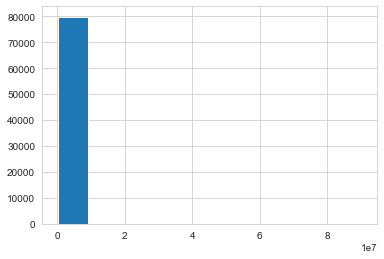

In [645]:
plt.hist(train['Income'])
plt.show()

In [646]:
upper_bound = 0.95
lower_bound = 0.1
res = train['Income'].quantile([lower_bound, upper_bound])
print(res)

0.10000    71200.00000
0.95000   450050.00000
Name: Income, dtype: float64


In [647]:
true_index = (train['Income'] < res.loc[upper_bound])
true_index

0        True
1        True
2        True
3        True
4        True
         ... 
79848    True
79849    True
79850    True
79851    True
79852    True
Name: Income, Length: 79853, dtype: bool

In [648]:
false_index = ~true_index

In [649]:
no_outlier_data = train[true_index].copy()
no_outlier_data.head()

,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,age
0,0.42900,355060,0.00000,0.00000,0.00000,99.02000,13,2,1,1,0
1,0.01000,315150,0.00000,0.00000,0.00000,99.89000,21,0,1,1,2
2,0.91700,84140,2.00000,3.00000,1.00000,98.69000,7,2,0,0,1
3,0.04900,250510,0.00000,0.00000,0.00000,99.57000,9,0,1,1,1
4,0.05200,198680,0.00000,0.00000,0.00000,99.87000,12,1,1,1,3


Makes Groups For Income

In [650]:
no_outlier_data['Income'] = pd.cut(no_outlier_data['Income'], 5)
no_outlier_data[['Income', 'target']].groupby('Income', as_index = False).count()

,Income,target
0,"(23603.99, 109232.0]",20493
1,"(109232.0, 194434.0]",26922
2,"(194434.0, 279636.0]",16575
3,"(279636.0, 364838.0]",8587
4,"(364838.0, 450040.0]",3269


In [651]:
train.loc[ train['Income'] <= 23603.99, 'Income'] = 0
train.loc[(train['Income'] > 23603.99) & (train['Income'] <= 109232.0), 'Income'] = 1
train.loc[(train['Income'] > 109232.0) & (train['Income'] <= 194434.0), 'Income'] = 2
train.loc[(train['Income'] > 194434.0) & (train['Income'] <= 279636.0), 'Income'] = 3
train.loc[(train['Income'] > 279636.0) & (train['Income'] <= 364838.0), 'Income'] = 4
train.loc[(train['Income'] > 364838.0) & (train['Income'] <= 450040.0), 'Income'] = 5
train.loc[ train['Income'] > 450040.0, 'Income'] = 6

In [652]:
train.loc[false_index, 'Income'] = 5

In [653]:
train.head()

,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,age
0,0.42900,4,0.00000,0.00000,0.00000,99.02000,13,2,1,1,0
1,0.01000,4,0.00000,0.00000,0.00000,99.89000,21,0,1,1,2
2,0.91700,1,2.00000,3.00000,1.00000,98.69000,7,2,0,0,1
3,0.04900,3,0.00000,0.00000,0.00000,99.57000,9,0,1,1,1
4,0.05200,3,0.00000,0.00000,0.00000,99.87000,12,1,1,1,3


Difference Between premiums and defaulters Grouping based on age

<AxesSubplot:xlabel='target', ylabel='count'>

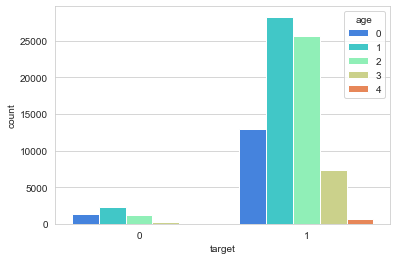

In [654]:
sns.set_style('whitegrid')
sns.countplot(x='target',hue='age',data=train,palette='rainbow')

Difference Between premiums and defaulters Grouping based on Sourcing Channel

<AxesSubplot:xlabel='target', ylabel='count'>

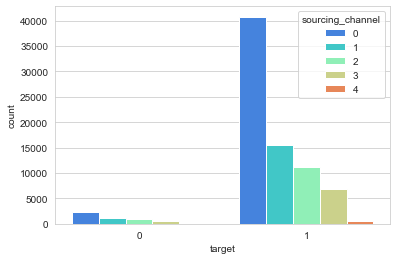

In [655]:
sns.set_style('whitegrid')
sns.countplot(x='target',hue='sourcing_channel',data=train,palette='rainbow')

<AxesSubplot:xlabel='target', ylabel='count'>

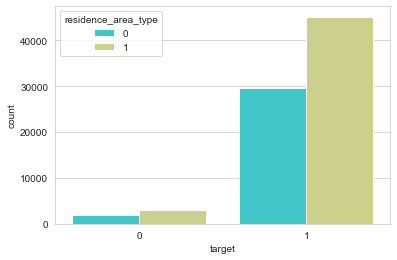

In [656]:
sns.set_style('whitegrid')
sns.countplot(x='target',hue='residence_area_type',data=train,palette='rainbow')

<AxesSubplot:xlabel='age', ylabel='Count_more_than_12_months_late'>

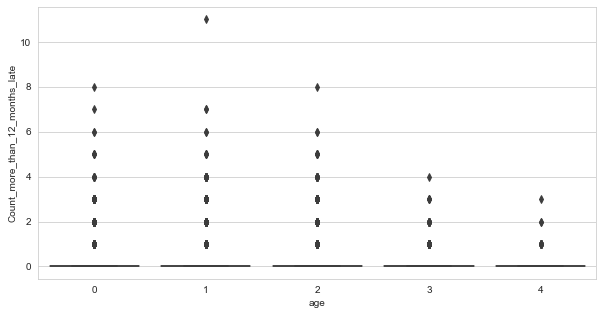

In [671]:
plt.figure(figsize=(10,5))
sns.boxplot(y='Count_more_than_12_months_late',x='age',data=train)

# 17-05-1996

# Dealing with Missing Values

<AxesSubplot:>

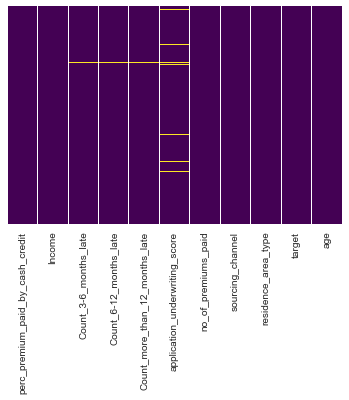

In [564]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In Applicaton there are missing values

In [565]:
train.isnull().sum()

perc_premium_paid_by_cash_credit       0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
target                                 0
age                                    0
dtype: int64

Count 3-6 months, Count 6-12 months, Count more than 12 months all three have '97' Missing Values
#Application_underwriting_score having 2974 Missing Values


In [566]:
train['application_underwriting_score'].mean()

99.06729119785638

In [567]:
train['application_underwriting_score'].median()

99.21

In [568]:
train[['age', 'application_underwriting_score']].groupby('age').mean()

,application_underwriting_score
age,
0,99.14585
1,98.97855
2,99.05765
3,99.30046
4,99.53748


In [569]:
train[['sourcing_channel', 'application_underwriting_score']].groupby('sourcing_channel').mean()

,application_underwriting_score
sourcing_channel,
0,99.10243
1,99.05586
2,98.97951
3,99.03836
4,99.06798


In [570]:
train[['Income', 'application_underwriting_score']].groupby('Income').mean()

,application_underwriting_score
Income,
1,98.85518
2,99.06835
3,99.14398
4,99.22309
5,99.27644


Filling Missing Values With Mean of Application based on Income Group

In [688]:
for dataset in [train]: 
    mask1 = dataset['application_underwriting_score'].isnull()
    for source in [0, 1, 2, 3, 4,5,6,7]:
        mask2 = (dataset['Income'] == source)
        source_mean = dataset[dataset['Income'] == source]['application_underwriting_score'].mean()
        dataset.loc[mask1 & mask2, 'application_underwriting_score'] = source_mean


Let us again have a look for missing values now.

In [689]:
train.isnull().sum()

perc_premium_paid_by_cash_credit     0
Income                               0
Count_3-6_months_late               97
Count_6-12_months_late              97
Count_more_than_12_months_late      97
application_underwriting_score       0
no_of_premiums_paid                  0
sourcing_channel                     0
residence_area_type                  0
target                               0
age                                  0
dtype: int64

Let us now remove the rows of missing values in order to get rid of missing values. As the number is small, we can remove them.

In [573]:
#null_data = train[train.isnull().any(axis=1)]

In [685]:
df=  train.dropna(axis=0,how='any')

In [686]:
df.isnull().sum()

perc_premium_paid_by_cash_credit    0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
target                              0
age                                 0
dtype: int64

Finally there are no missing values in the dataset.

<AxesSubplot:>

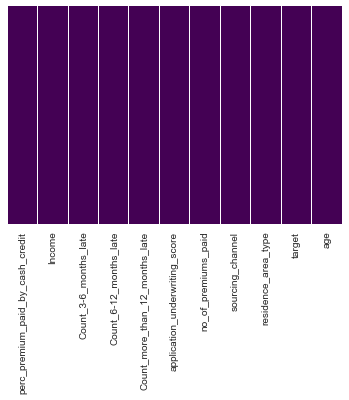

In [684]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [576]:
df.columns

Index(['perc_premium_paid_by_cash_credit', 'Income', 'Count_3-6_months_late',
       'Count_6-12_months_late', 'Count_more_than_12_months_late',
       'application_underwriting_score', 'no_of_premiums_paid',
       'sourcing_channel', 'residence_area_type', 'target', 'age'],
      dtype='object')

# Model Building and Evaluation

# Logistic Regression

Let's make the data splits

In [577]:
x=df.drop('target',axis=1)

In [578]:
x.shape

(79756, 10)

In [579]:
y= df['target']

In [580]:
y.shape

(79756,)

In [581]:
from sklearn.model_selection import train_test_split

In [582]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

In [583]:
from sklearn.linear_model import LogisticRegression

In [584]:
lr = LogisticRegression()

In [585]:
lr.fit(X_train,y_train)

LogisticRegression()

In [586]:
y_pred = lr.predict(X_test)

In [587]:
lr.score(X_train,y_train)

0.9395440202286168

In [588]:
acc_log = round(lr.score(X_train, y_train) * 100, 2)
acc_log
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm = confusion_matrix(lr.predict(X_train),y_train)
print(cm)

print(classification_report(lr.predict(X_train),y_train))

[[  362   285]
 [ 2608 44598]]
              precision    recall  f1-score   support

           0       0.12      0.56      0.20       647
           1       0.99      0.94      0.97     47206

    accuracy                           0.94     47853
   macro avg       0.56      0.75      0.58     47853
weighted avg       0.98      0.94      0.96     47853



In [589]:
tnr = np.round(cm[0][0]/(cm[0][0] + cm[1][0]) * 100,3)
tpr = np.round(cm[1][1]/(cm[1][1] + cm[0][1]) * 100,3)
fpr = np.round(cm[1][0] / (cm[1][0] + cm[0][0]) * 100,3)
print('TPR = ',tpr,'%')
print('TNR = ',tnr,'%')
print('FPR = ',fpr,'%')

TPR =  99.365 %
TNR =  12.189 %
FPR =  87.811 %


# Decision Tree

Let's make the data splits

In [590]:
from sklearn.model_selection import train_test_split

In [591]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

In [592]:
from sklearn.tree import DecisionTreeClassifier

In [593]:
clf = DecisionTreeClassifier()

In [594]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [595]:
clf.score(X_train,y_train)

0.9992476960692119

In [596]:
clf.predict(X_test)

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [597]:
clf.score(X_test,y_test)

0.897783907469517

In [598]:
acc_decision_tree = round(clf.score(X_train, y_train) * 100, 2)
acc_decision_tree
cm = confusion_matrix(clf.predict(X_train),y_train)
print(cm)

print(classification_report(clf.predict(X_train),y_train))

tnr = np.round(cm[0][0]/(cm[0][0] + cm[1][0]) * 100,3)
tpr = np.round(cm[1][1]/(cm[1][1] + cm[0][1]) * 100,3)
fpr = np.round(cm[1][0] / (cm[1][0] + cm[0][0]) * 100,3)
print('TPR = ',tpr,'%')
print('TNR = ',tnr,'%')
print('FPR = ',fpr,'%')

[[ 2952    18]
 [   18 44865]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2970
           1       1.00      1.00      1.00     44883

    accuracy                           1.00     47853
   macro avg       1.00      1.00      1.00     47853
weighted avg       1.00      1.00      1.00     47853

TPR =  99.96 %
TNR =  99.394 %
FPR =  0.606 %


# 17/05/1996

# For Test Data

In [599]:
test.loc[ test['age'] <= 37.4, 'age'] = 0
test.loc[(test['age'] > 37.4) & (test['age'] <= 53.8), 'age'] = 1
test.loc[(test['age'] > 53.8) & (test['age'] <= 70.2), 'age'] = 2
test.loc[(test['age'] > 70.2) & (test['age'] <= 86.6), 'age'] = 3
test.loc[ test['age'] > 86.6, 'age'] = 4
#test.drop('AgeBands', axis = 1, inplace = True)

In [600]:
test['residence_area_type'] = test['residence_area_type'].map( {'Urban' : 1, 'Rural' : 0} )

In [601]:
test['sourcing_channel'] = test['sourcing_channel'].map( {'A' : 0, 'B' : 1, 'C' : 2, 'D' : 3, 'E' : 4} )

In [602]:
upper_bound = 0.95
lower_bound = 0.1
res = test['Income'].quantile([lower_bound, upper_bound])
print(res)

0.10000    71573.00000
0.95000   435100.00000
Name: Income, dtype: float64


In [603]:
true_index = (test['Income'] < res.loc[upper_bound])
true_index

0        True
1        True
2        True
3        True
4        True
         ... 
34219    True
34220    True
34221    True
34222    True
34223    True
Name: Income, Length: 34224, dtype: bool

In [604]:
false_index = ~true_index

In [605]:
no_outlier_data = test[true_index].copy()
no_outlier_data.head()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,age
0,649,0.00100,51150,0.00000,0.00000,0.00000,99.89000,7,0,0,3
1,81136,0.12400,285140,0.00000,0.00000,0.00000,98.93000,19,0,1,2
2,70762,1.00000,186030,0.00000,0.00000,0.00000,NaN,2,1,1,1
3,53935,0.19800,123540,0.00000,0.00000,0.00000,99.00000,11,1,0,1
4,15476,0.04100,200020,1.00000,0.00000,0.00000,99.17000,14,0,0,0


In [606]:
no_outlier_data['IncomeBands'] = pd.cut(no_outlier_data['Income'], 5)
#no_outlier_data[['IncomeBands', 'target']].groupby('IncomeBands', as_index = False).count()

In [607]:
test.loc[ test['Income'] <= 23603.99, 'Income'] = 0
test.loc[(test['Income'] > 23603.99) & (test['Income'] <= 109232.0), 'Income'] = 1
test.loc[(test['Income'] > 109232.0) & (test['Income'] <= 194434.0), 'Income'] = 2
test.loc[(test['Income'] > 194434.0) & (test['Income'] <= 279636.0), 'Income'] = 3
test.loc[(test['Income'] > 279636.0) & (test['Income'] <= 364838.0), 'Income'] = 4
test.loc[(test['Income'] > 364838.0) & (test['Income'] <= 450040.0), 'Income'] = 5
test.loc[ test['Income'] > 450040.0, 'Income'] = 6

In [608]:
test.loc[false_index, 'Income'] = 5

In [609]:
for dataset in [test]: 
    mask1 = dataset['application_underwriting_score'].isnull()
    for source in [0, 1, 2, 3, 4,5,6,7]:
        mask2 = (dataset['Income'] == source)
        source_mean = dataset[dataset['Income'] == source]['application_underwriting_score'].mean()
        dataset.loc[mask1 & mask2, 'application_underwriting_score'] = source_mean


In [610]:
test.isnull().sum()

id                                   0
perc_premium_paid_by_cash_credit     0
Income                               0
Count_3-6_months_late               31
Count_6-12_months_late              31
Count_more_than_12_months_late      31
application_underwriting_score       0
no_of_premiums_paid                  0
sourcing_channel                     0
residence_area_type                  0
age                                  0
dtype: int64

In [611]:
#null_data_test = test[test.isnull().any(axis=1)]

In [612]:
#df_test=  test.dropna(axis=0,how='any')

In [613]:
test['Count_3-6_months_late'] = test['Count_3-6_months_late'].fillna(0)
test['Count_6-12_months_late'] = test['Count_6-12_months_late'].fillna(0)
test['Count_more_than_12_months_late'] = test['Count_more_than_12_months_late'].fillna(0) 

In [614]:
test.shape

(34224, 11)

In [615]:
test_id = test['id'].copy()

In [616]:
test.drop(['id'],axis=1,inplace=True)

In [617]:
test_id

0          649
1        81136
2        70762
3        53935
4        15476
         ...  
34219    81988
34220    30326
34221    65749
34222    65686
34223    93826
Name: id, Length: 34224, dtype: int64

In [618]:
x_test = test[['perc_premium_paid_by_cash_credit','Income','Count_3-6_months_late','Count_6-12_months_late','Count_more_than_12_months_late','application_underwriting_score','no_of_premiums_paid','sourcing_channel','residence_area_type','age']]

Logict

In [619]:
y_pred = lr.predict(x_test)

# Decision Tree

In [620]:
result = clf.predict(x_test)

In [621]:
result

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [622]:
np.unique(result, return_counts=True)

(array([0, 1], dtype=int64), array([ 2489, 31735], dtype=int64))

In [623]:
dict = {'id':test_id ,'target':result}

In [624]:
sample = pd.DataFrame(dict)

In [625]:
#sample.to_csv('Sample.csv',index=False)